# **시각화 과제**
▶ 앞으로 토나오게(...) 사용할 **그래프 유형을 학습**하는 데에 주안점을 두고 진행해주세요!

In [1]:
# 필요한 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")  # matplotlib style 설정

# 사진 파일 불러오기
!pip install IPython
from IPython.display import Image

# 문법 변경에 의한 경고를 무시
import warnings
warnings.filterwarnings('ignore')

# 폰트 안 깨지게 설정
import platform
from matplotlib import font_manager

def set_korean_font():
    """
    운영체제에 맞는 한글 폰트를 설정합니다.
    """
    os_name = platform.system()
    
    if os_name == 'Windows':
        font_name = 'Malgun Gothic'
    elif os_name == 'Darwin': # macOS
        font_name = 'AppleGothic'

    # 전역으로 폰트 설정
    plt.rc('font', family=font_name)
    
    # 마이너스 부호 깨짐 방지 설정
    plt.rc('axes', unicode_minus=False)
    
    print(f"'{font_name}' 폰트로 설정되었습니다.")

set_korean_font()


'Malgun Gothic' 폰트로 설정되었습니다.


### (0) titanic_set.csv 데이터를 변수 data로 불러오세요.

In [21]:
# pandas 모듈의 read_csv() 이용하여 코드 작성

data=pd.read_csv('./titanic_set.csv')

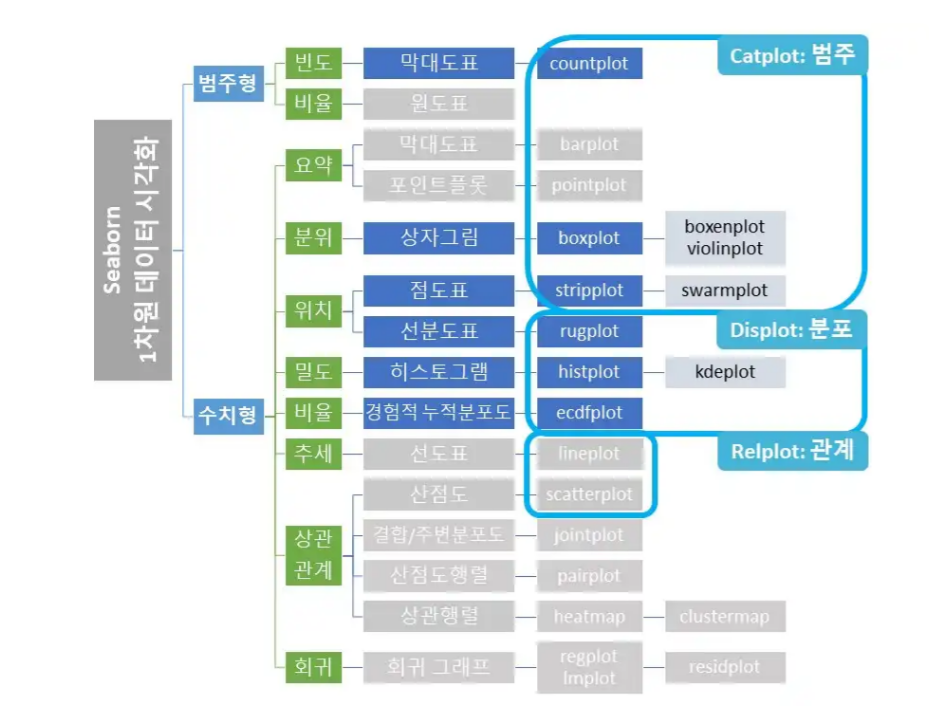

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> countplot(범주형), histplot(수치형) </span>
▶ 데이터의 분포와 빈도를 시각화하는 기본적인 플롯

<Axes: xlabel='Survived', ylabel='count'>

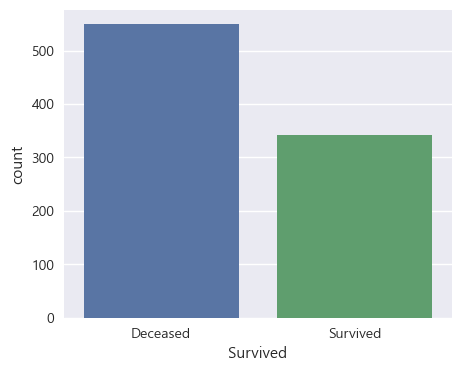

In [4]:
plt.figure(figsize=(5,4))
sns.countplot(data=data,x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

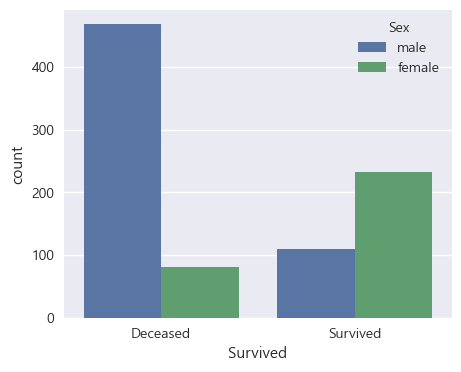

In [5]:
plt.figure(figsize=(5,4))
sns.countplot(data=data,x='Survived',hue='Sex')

<Axes: xlabel='Age', ylabel='Count'>

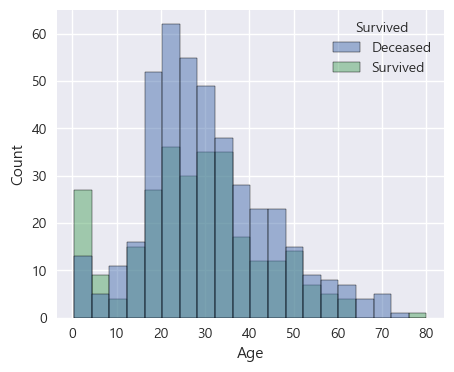

In [6]:
plt.figure(figsize=(5,4))
sns.histplot(data=data,x="Age",hue='Survived')

### (1) 승선항(Embarked)별 생존여부를 hue파라미터를 이용해 확인해보세요.

<Axes: xlabel='Survived', ylabel='count'>

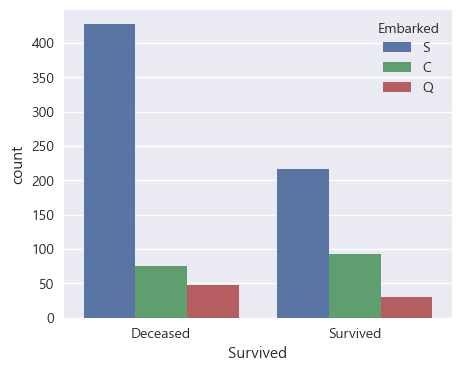

In [7]:
plt.figure(figsize=(5,4))
sns.countplot(data=data,x='Survived',hue='Embarked')

### (2) 나이대별 생존여부를 hue파라미터를 이용해 확인해보세요.

In [33]:
data_rep=data.copy()

In [34]:
bins=[0,10,20,30,40,50,60,70,100]
labels=['0~9','10~19','20~29','30~39','40~49','50~59','60~69','70~']

data_rep['Age_range']=pd.cut(data_rep['Age'], bins=bins, labels=labels, include_lowest=True)

In [35]:
data_rep

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range
0,0,1,Deceased,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20~29
1,1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30~39
2,2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20~29
3,3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30~39
4,4,5,Deceased,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30~39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,Deceased,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20~29
887,887,888,Survived,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,10~19
888,888,889,Deceased,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,889,890,Survived,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,20~29


<Axes: xlabel='Age_range', ylabel='Count'>

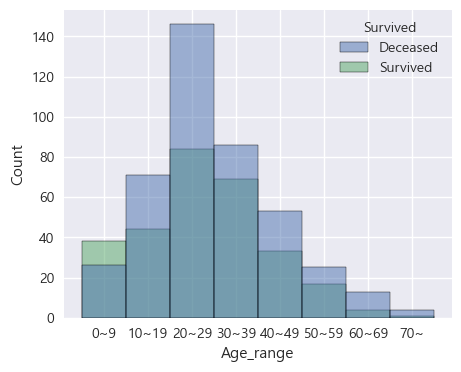

In [38]:
plt.figure(figsize=(5,4))
sns.histplot(data=data_rep,x='Age_range',hue='Survived')

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> displot, kdeplot(커널밀도함수) </span> 

▶ 히스토그램을 매끄럽게 곡선으로 연결한 그래프 <br>
▶ displot 함수의 kde 파라미터에 True를 전달하면 밀도 곡선이 표현됨

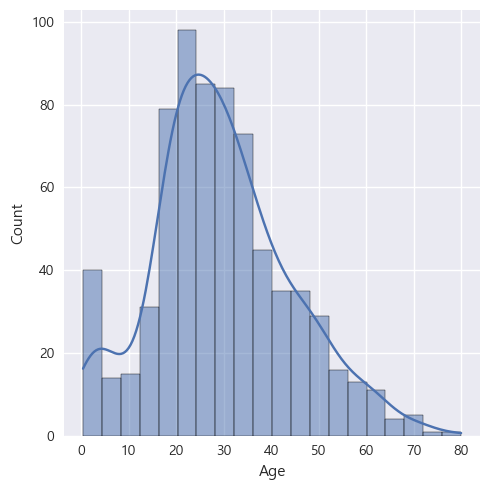

In [ ]:
sns.displot(data["Age"],kde=True)

<Axes: xlabel='Age', ylabel='Density'>

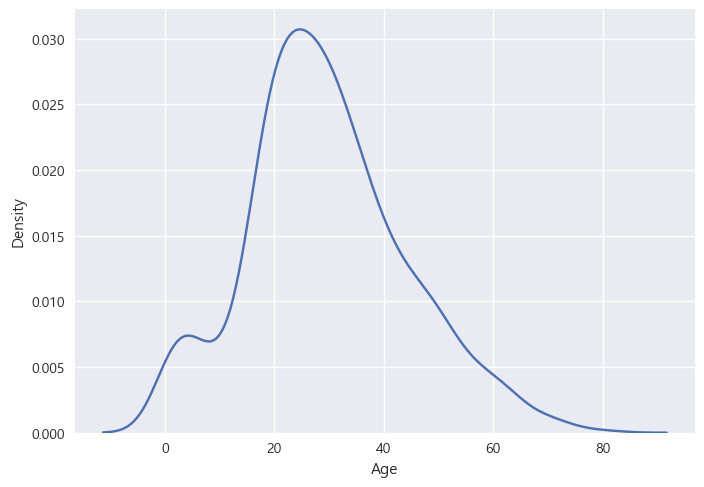

In [40]:
sns.kdeplot(data["Age"])

### (3) displot으로 요금(Fare)의 분포를 확인해보세요.

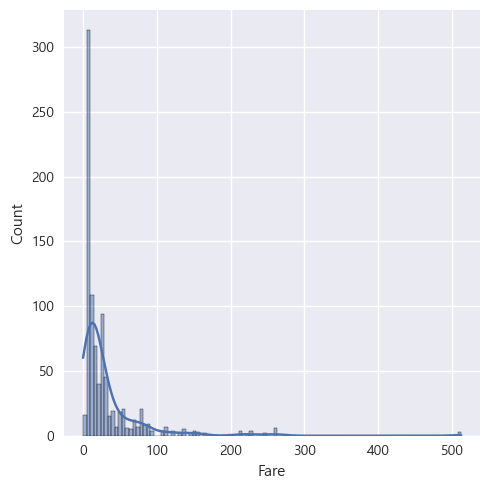

In [41]:
sns.displot(data['Fare'],kde=True)

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> barplot(범주형), pointplot(연속형)</span>
▶ x에 따른 y의 평균값을 나타내는 그래프

<Axes: xlabel='Sex', ylabel='Age'>

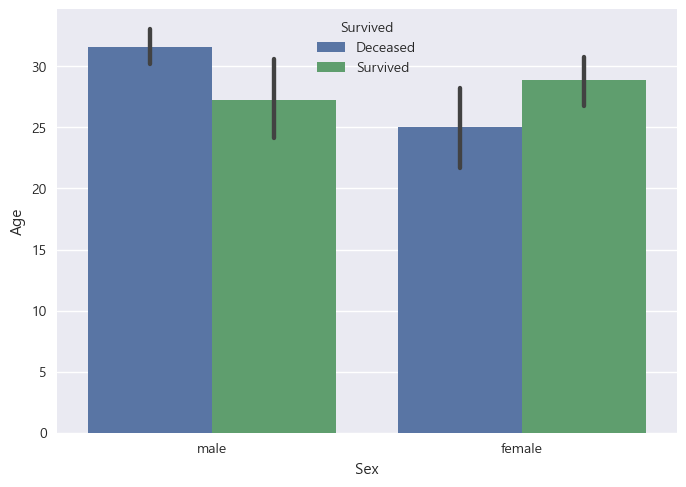

In [42]:
sns.barplot(data=data, x='Sex', y='Age', hue="Survived")

<Axes: xlabel='Age', ylabel='Fare'>

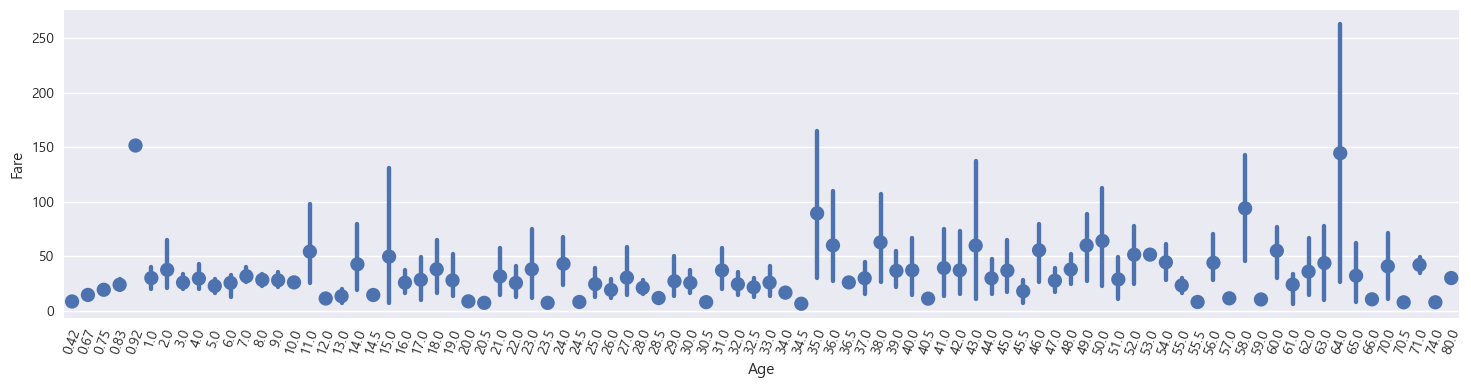

In [45]:
plt.figure(figsize=(18,4))
plt.xticks(rotation=70)
sns.pointplot(data=data,x='Age',y='Fare',linestyles="",)

### (4) Pclass 별 생존율을 barplot을 통해 확인해보세요.

<Axes: xlabel='Pclass', ylabel='Survived'>

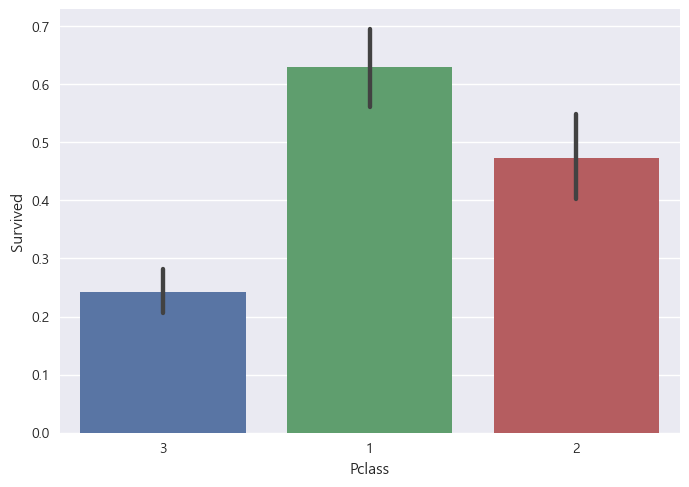

In [58]:
data_rep['Survived']=data_rep['Survived'].replace(['Survived','Deceased'],[1,0])
data_rep['Pclass']=data_rep['Pclass'].astype(str)

sns.barplot(data=data_rep, x='Pclass',y='Survived')

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> boxplot</span>

▶데이터의 중앙값, 사분위수, 그리고 이상치를 시각적으로 표현하는 그래프

<Axes: xlabel='Pclass', ylabel='Age'>

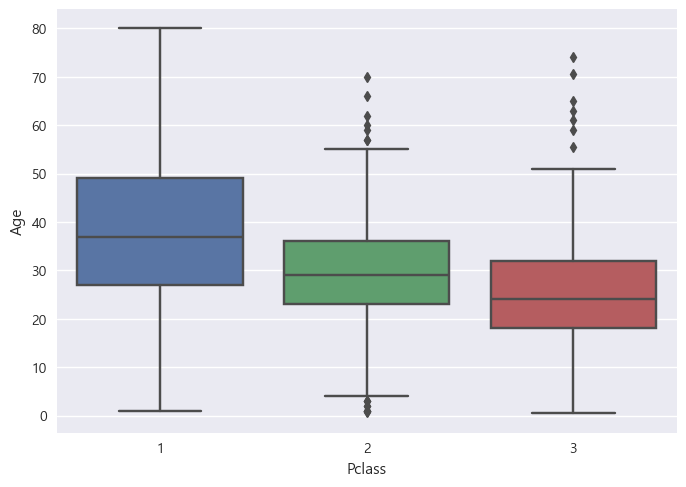

In [59]:
sns.boxplot(data=data, x='Pclass', y='Age')

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> scatterplot</span> 

▶ 데이터를 점으로 찍어 분포를 보는 산점도 그래프 <br>
▶ 두 연속변수간의 상관관계를 확인할 때 유용함

<Axes: xlabel='Age', ylabel='Fare'>

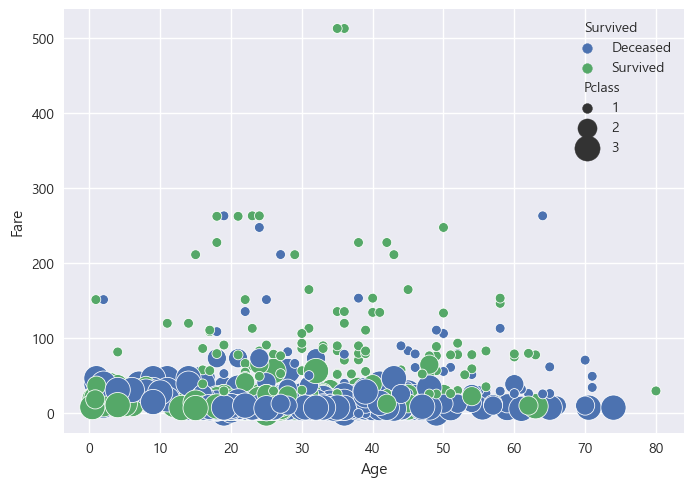

In [60]:
sns.scatterplot(data=data, x="Age",y='Fare',hue="Survived", 
                size='Pclass', sizes=(50,330))

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> regplot</span>

▶ 회귀선이 추가된 산점도 그래프 <br>
▶ 두 개의 연속 변수 사이의 산점도를 그리고 선형회귀분석에 의한 회귀선을 함께 나타냄

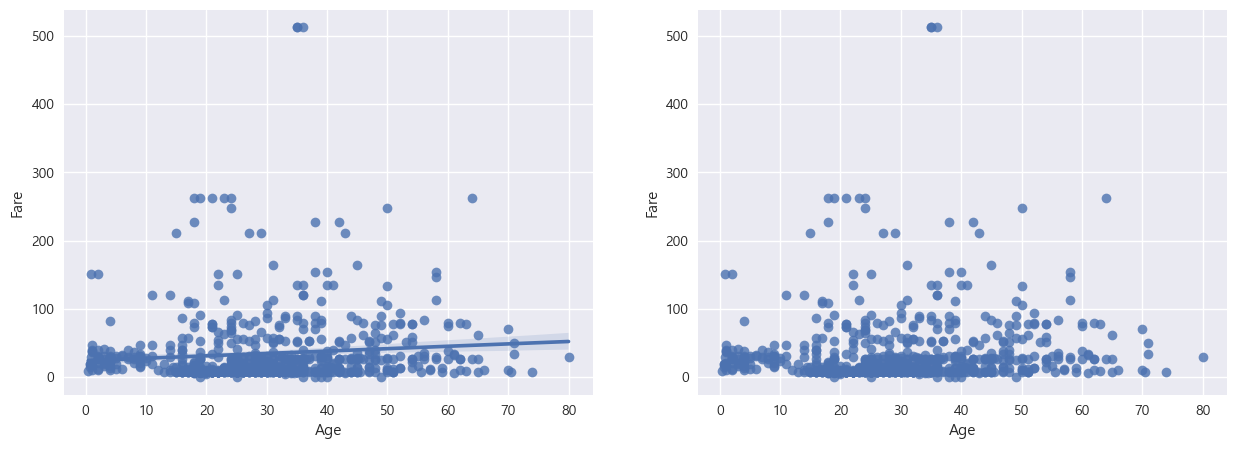

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='Age',y='Fare',data=data,ax=ax1) ## 회귀선 있는 버전
sns.regplot(x='Age',y='Fare',data=data, ax=ax2, fit_reg=False) ## 회귀선 없는 버전

plt.show()

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> pieplot</span> 

▶ 데이터의 비율을 시각적으로 표현하는 데 사용

Text(0.5, 1.0, 'Embarked')

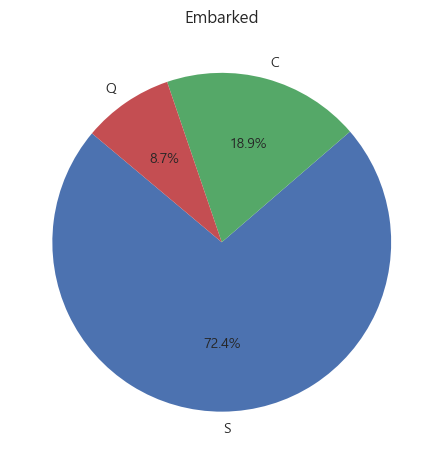

In [64]:
embarked_counts = data['Embarked'].value_counts()
plt.pie(embarked_counts, labels=embarked_counts.index, 
        autopct='%1.1f%%', startangle=140)
plt.title("Embarked")

### (5) Pclass를 파이플롯으로 나타내보세요.

Text(0.5, 1.0, 'Pclass')

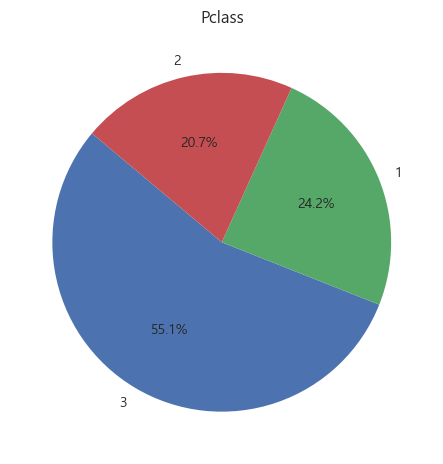

In [66]:
# 'embarked_counts'에 새로운 값을 할당하여 코드 작성
embarked_counts = data['Pclass'].value_counts()
plt.pie(embarked_counts, labels=embarked_counts.index, 
        autopct='%1.1f%%', startangle=140)
plt.title("Pclass")

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> heatmap</span> 

▶ 변수간 상관계수를 직관적 볼 수 있는 그래프 <br>
▶ corr()함수로 변수간의 상관계수를 구하고 이를 히트맵에 표현할 수 있음

### (6) 수치형 변수만 모아 새로운 데이터 프레임을 만들고 히트맵을 찍어보겠습니다.

<Axes: >

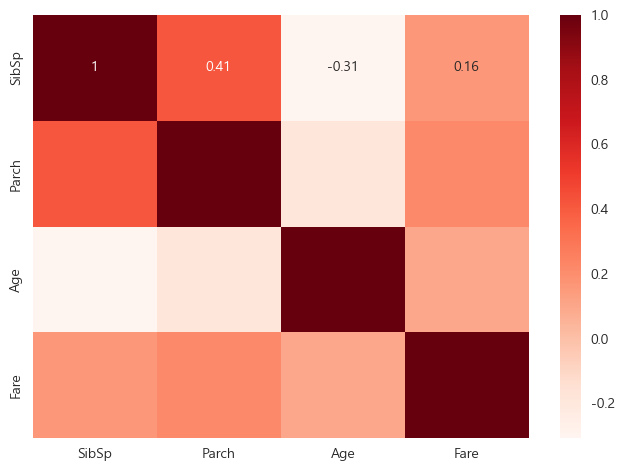

In [68]:
df= data[['SibSp','Parch','Age', 'Fare']]
sns.heatmap(df.corr(),annot=True,cmap='Reds') 
#annot 파라미터는 상관계수 표시 여부 결정

<Axes: >

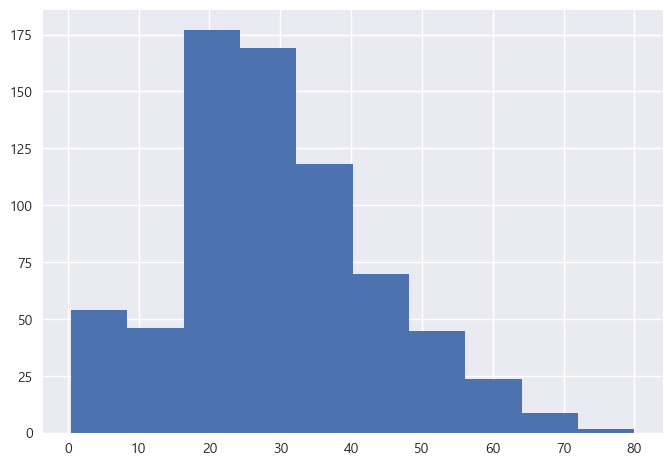

In [69]:
data['Age'].hist()

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> catplot</span> 

▶ 범주형 데이터와 연속형 데이터를 함께 시각화할 수 있음

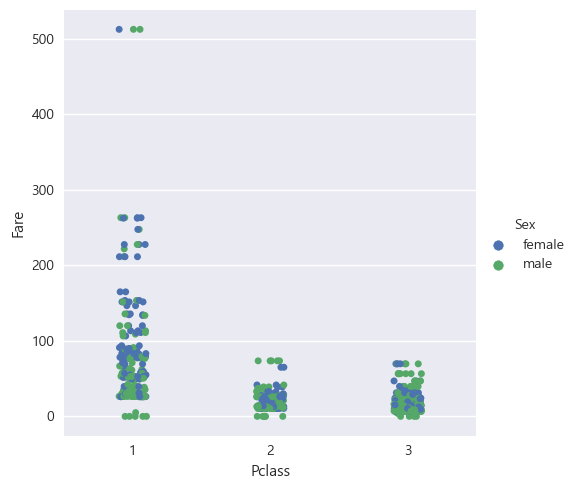

In [72]:
sns.catplot(x='Pclass', y='Fare', hue='Sex', data=data)

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 여러 개의 플롯 결합 </span> 

▶ 여러 개의 그래프를 찍는 공식 <br>
f, ax = plt.subplots(1, 2, figsize=(12, 4))

▶ f는 도화지, ax는 만화를 그릴 때의 하나의 컷!
즉, 도화지를 1행 2열로 쪼개겠다는 의미이고 figsize는 도화지의 크기임

<Axes: xlabel='Sex', ylabel='Age'>

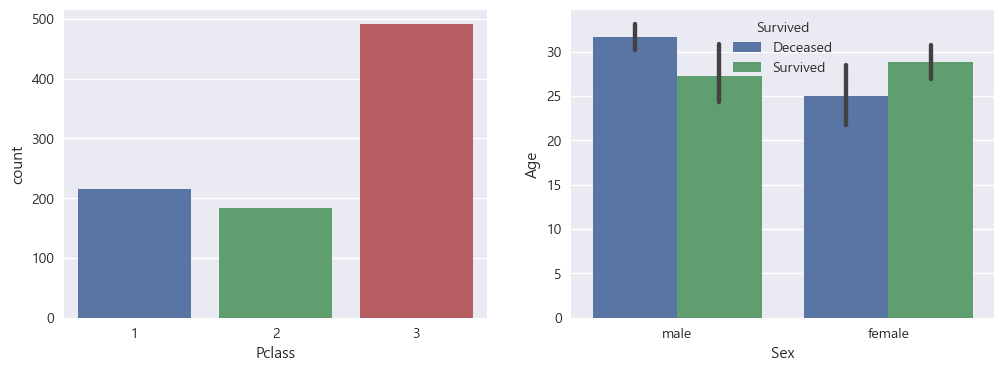

In [73]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))  # 1행 2열의 서브플롯 생성
sns.countplot(x='Pclass', data=data,ax=ax[0])
sns.barplot(x='Sex', y='Age',data=data, hue="Survived",ax=ax[1])

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> pairplot</span> 

▶ 다변량 데이터셋에서 각 변수 쌍 간의 관계를 시각적으로 표현하는 그래프 <br>
▶ 변수 간의 분포와 상관관계를 파악하는 데 사용함

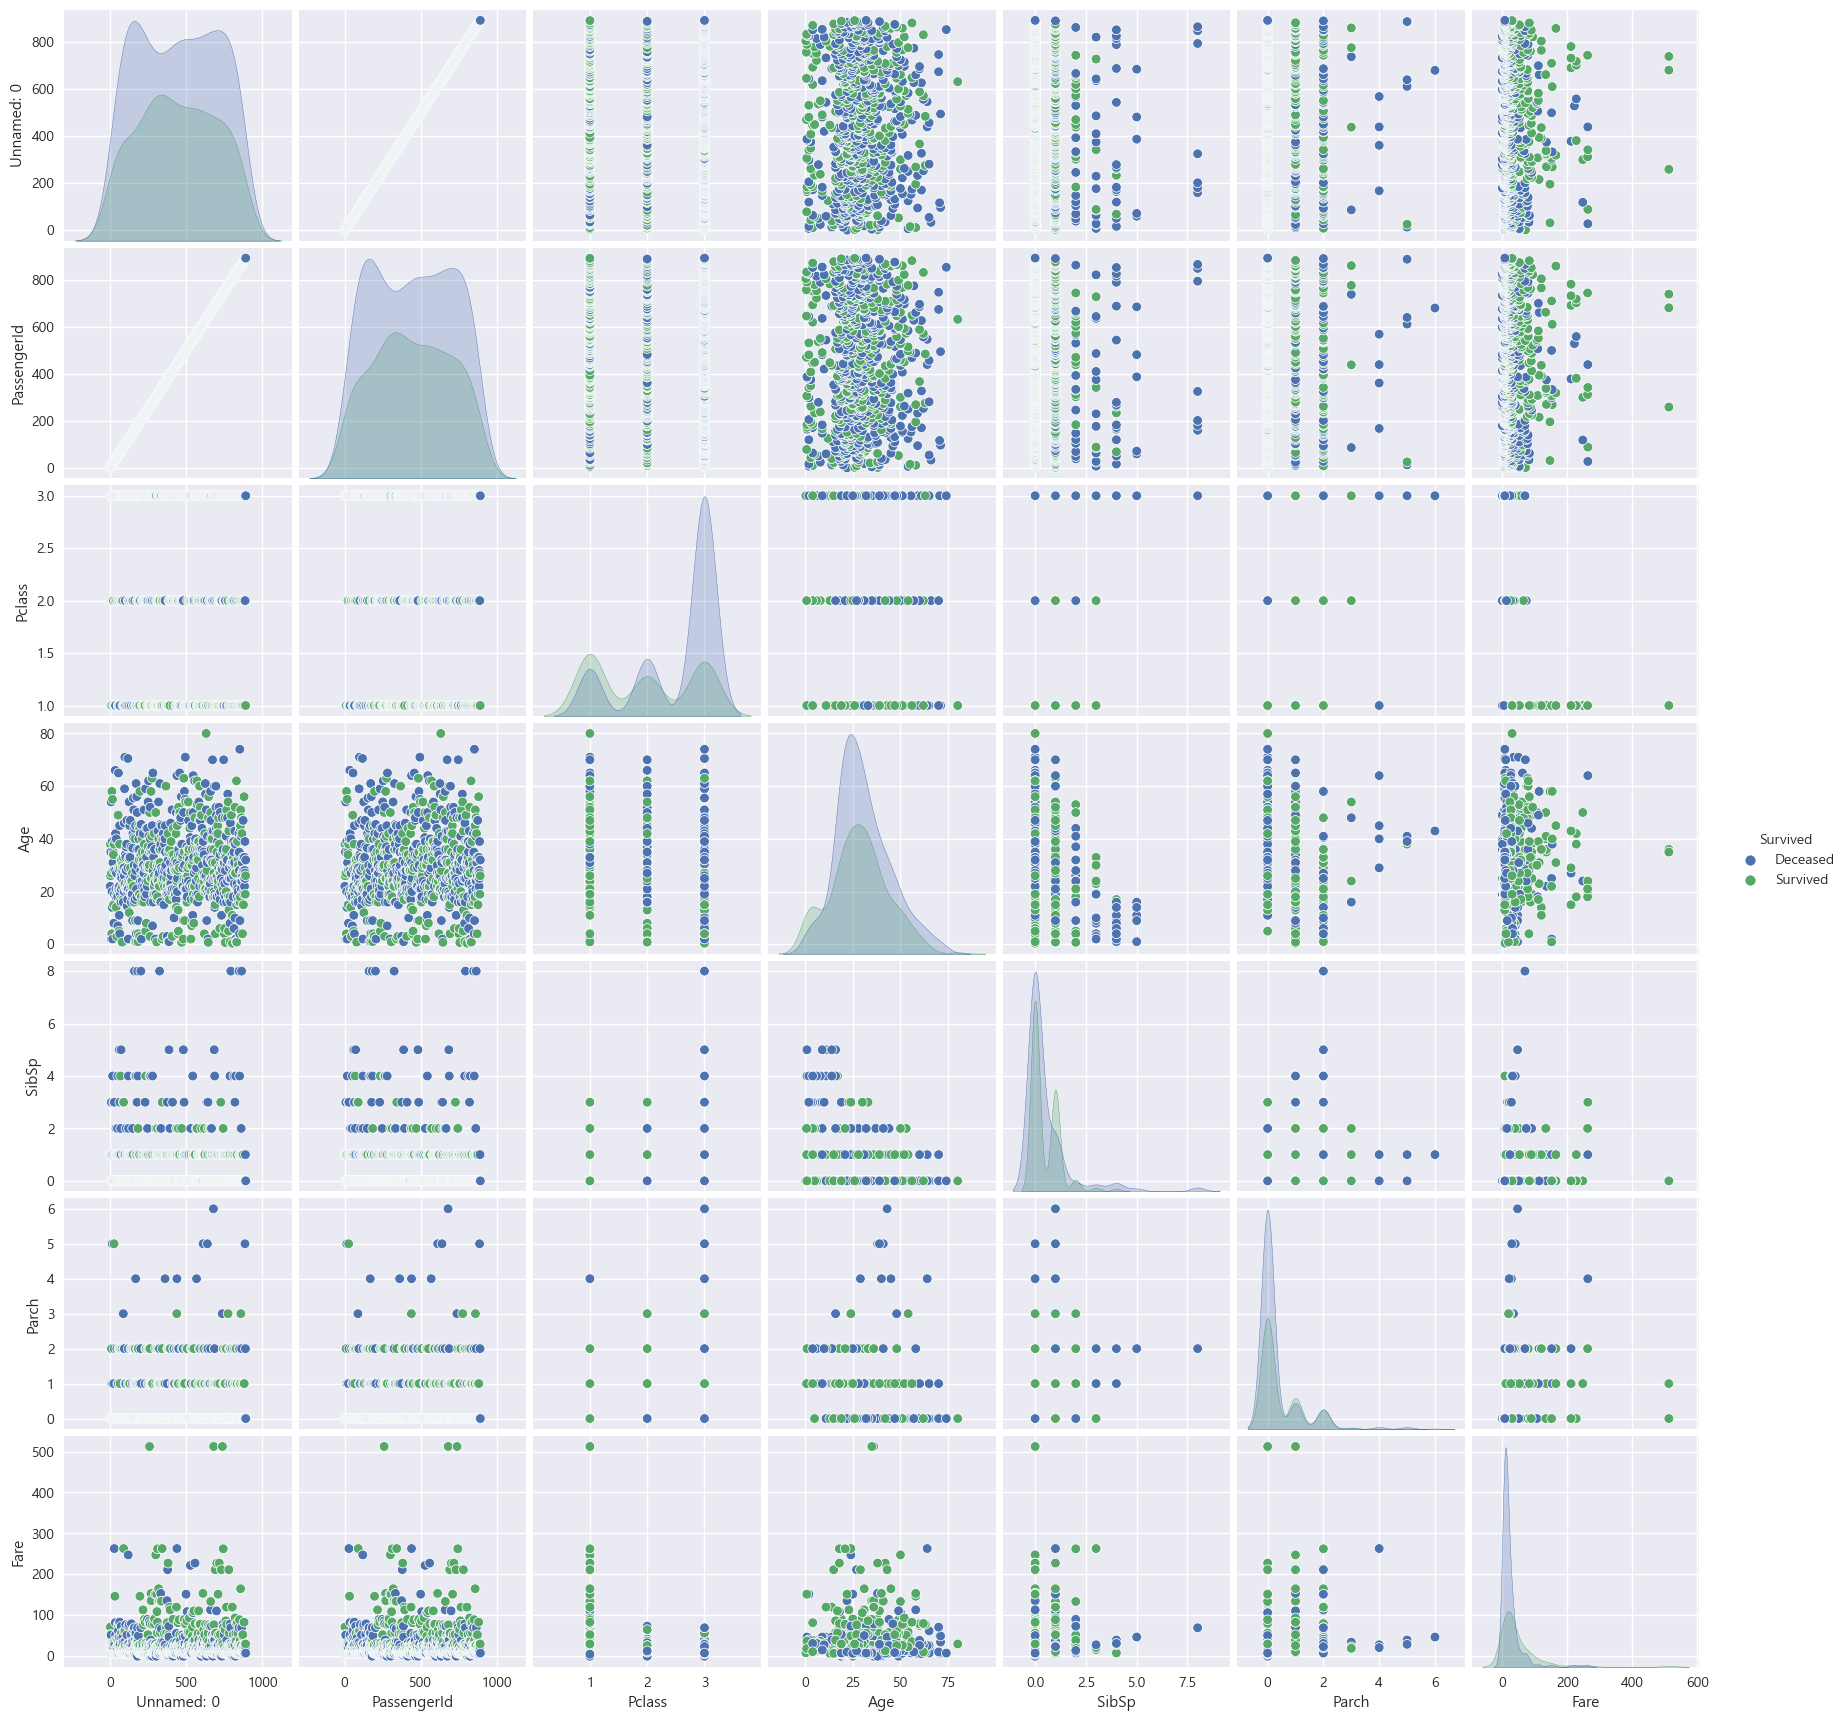

In [75]:
sns.pairplot(data=data, hue="Survived")

# <span style="background-color:#E0F7FA; color:#1565C0; padding:4px; border-radius:5px;"> 직접 찍어보기</span> 

### (7) 그래프를 그릴 2x2칸을 설정해보세요.

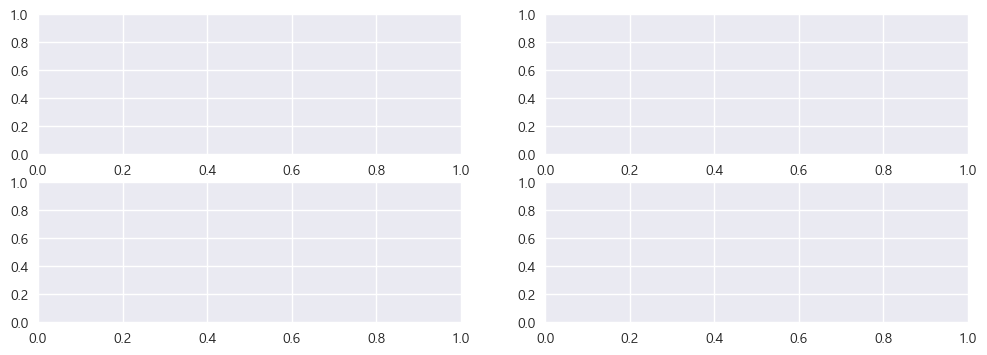

In [78]:
# 2행 2열의 서브플롯 생성
f, ax = plt.subplots(2, 2, figsize=(12, 4))

<Axes: xlabel='Fare', ylabel='Pclass'>

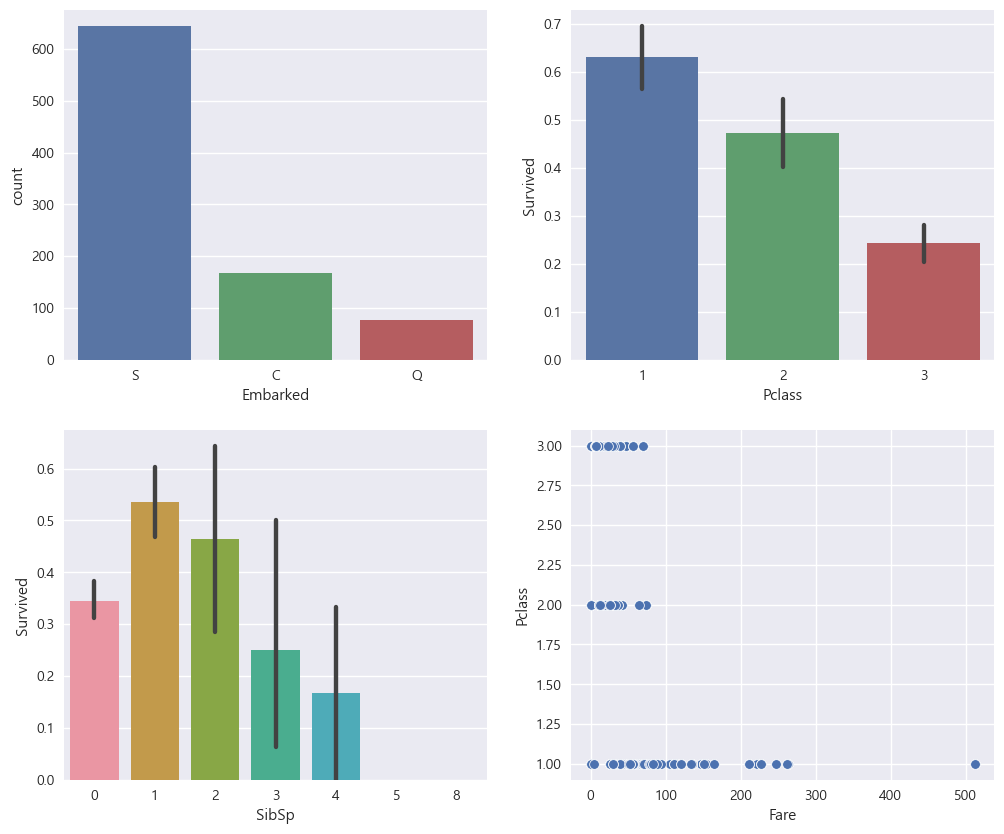

In [104]:
f, ax = plt.subplots(2, 2, figsize=(12, 10))
sns.countplot(data=data, x='Embarked', ax=ax[0,0])
sns.barplot(data=data_rep, x='Pclass', y='Survived', order=['1','2','3'], ax=ax[0,1])
sns.barplot(data=data_rep, x='SibSp', y='Survived', ax=ax[1,0])
sns.scatterplot(data=data, x='Fare', y='Pclass', ax=ax[1,1])

### (8) 1행 1열에 승선항(Embarked)별 승객의 수를 알 수 있는 시각화를 진행해보세요.

Q. 승객이 많은 승선항 순으로 나열하면? <br>
A. S ⇒ C ⇒ Q

### (9) 2행 2열에 객실 등급(Pclass)에 따른 생존율을 알아 볼 수 있는 시각화를 진행해보세요.

Q. 생존률이 가장 높은 등급은? <BR>
A. 1등석

In [106]:
data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

### (10) 나머지 칸에 본인이 파악하고 싶은 정보를 자유롭게 시각화하고, 인사이트를 작성해보세요.

Q. 알아낸 것은? <BR>
A1. 동승한 형제자매 또는 배우자가 없는 경우보다 1~2명 있는 경우의 생존율이 더 높다.(가족을 통해 사고 정보 등의 전달이 되었다?, 3명 이상이면 다 같이 대피에 실패하거나 가족을 먼저 대피시킨 경우?)<BR>
A2. 다만 2명 이상일 경우 표본이 적어서(value_counts()로 확인) 신뢰구간이 크게 나타난다. <BR>
A3. 등석별로 요금이 크게 차이나지 않는 구간도 있다(0~100) <BR>